In [1]:
import importlib
import sys
import numpy as np
import matplotlib.pyplot as plt
from data import get_ambient_temperatures, interpolate_temperature

In [23]:
_ = importlib.reload(sys.modules['data'])
from data import Data, get_ambient_temperatures, interpolate_temperature

### Get Ambient Temperature data from Niagara

In [2]:
# path to data directories (the directories named by 1st 5 digits of unix time)
path2dir_100 = '/project/s/sievers/prizm/marion2022/prizm-100/data_100MHz/temperatures'
path2dir_70 = '/project/s/sievers/prizm/marion2022/prizm-70/data_70MHz/temperatures'

In [3]:
T_amb_100, time_sys_start_100, time_sys_stop_100 = get_ambient_temperatures('100MHz', path2dir_100, verbose=True)
T_amb_70, time_sys_start_70, time_sys_stop_70 = get_ambient_temperatures('70MHz', path2dir_70, verbose=True)

1635546923 100MHz array mismatch
1635550526 100MHz array mismatch
1635557751 100MHz array mismatch
1635564966 100MHz array mismatch
1635579397 100MHz array mismatch
1635593827 100MHz array mismatch
1635597437 100MHz array mismatch
1635604663 100MHz array mismatch
1636865067 100MHz array mismatch
1636875908 100MHz array mismatch
1637020970 100MHz array mismatch
1637292011 100MHz array mismatch
1637299229 100MHz array mismatch
1637302831 100MHz array mismatch
1637310045 100MHz array mismatch
1637317264 100MHz array mismatch
1635528927 70MHz array mismatch
1635536134 70MHz array mismatch
1635546961 70MHz array mismatch
1635550573 70MHz array mismatch
1635561395 70MHz array mismatch
1637017424 70MHz array mismatch
1637028242 70MHz array mismatch
1637031846 70MHz array mismatch
1637042666 70MHz array mismatch
1637046266 70MHz array mismatch
1637049879 70MHz array mismatch
1637057099 70MHz array mismatch
1637060706 70MHz array mismatch
1637064312 70MHz array mismatch
1637075123 70MHz array m

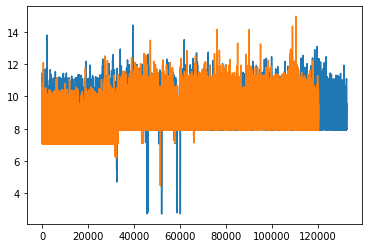

In [4]:
# check integration times look normal
plt.plot(time_sys_stop_100 - time_sys_start_100)
plt.plot(time_sys_stop_70 - time_sys_start_70)

In [5]:
# calculate time stamp as average of start & stop times
time_sys_100 = (time_sys_start_100 + time_sys_stop_100) / 2
time_sys_70 = (time_sys_start_70 + time_sys_stop_70) / 2

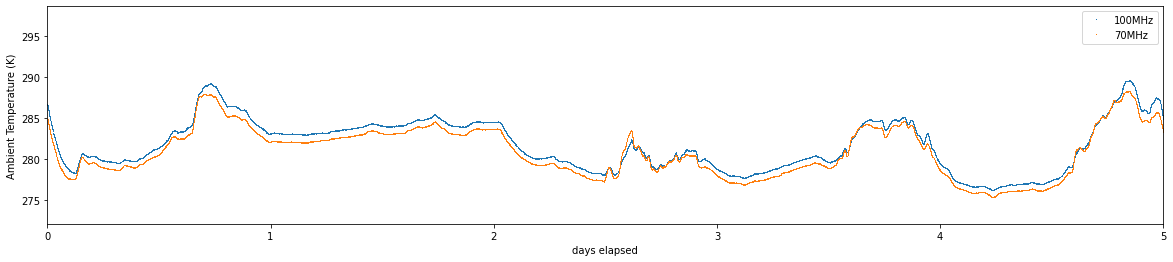

In [6]:
plt.figure(figsize=(20,4))
plt.ylabel('Ambient Temperature (K)')
plt.xlabel('days elapsed')
plt.xlim(0,5)
plt.plot((time_sys_100 - time_sys_100[0])/24/3600, T_amb_100, ',', label='100MHz')
plt.plot((time_sys_70 - time_sys_100[0])/24/3600, T_amb_70, ',', label='70MHz')
plt.legend()

In [7]:
np.savez('Temperature/T_ambient_100MHz.npz', T_amb=T_amb_100, systime=time_sys_100)
np.savez('Temperature/T_ambient_70MHz.npz', T_amb=T_amb_70, systime=time_sys_70)

### Compare time coverage with antenna data

In [8]:
instrument = '100MHz'
year = '2021'

channel = 'NS'
path2file = f'../Data/{year}/{instrument[:-3]}/{channel}/'
file_ending = f'_{year}_{instrument[:-3]}{channel}.npy'
with open(path2file + 'systime' + file_ending, 'rb') as f:
    systime_EW = np.load(f)
    
channel = 'EW'
path2file = f'../Data/{year}/{instrument[:-3]}/{channel}/'
file_ending = f'_{year}_{instrument[:-3]}{channel}.npy'
with open(path2file + 'systime' + file_ending, 'rb') as f:
    systime_NS = np.load(f)
    
instrument = '70MHz'
year = '2021'

channel = 'EW'
path2file = f'../Data/{year}/{instrument[:-3]}/{channel}/'
file_ending = f'_{year}_{instrument[:-3]}{channel}.npy'
with open(path2file + 'systime' + file_ending, 'rb') as f:
    systime_70 = np.load(f)

### Interpolate

In [9]:
T_amb_100EW, temp_time_EW, interp_inds = interpolate_temperature(T_amb_100, time_sys_100, systime_EW)
T_amb_100NS, temp_time_NS, interp_inds = interpolate_temperature(T_amb_100, time_sys_100, systime_NS)
T_amb_70EW, temp_time_70, interp_inds = interpolate_temperature(T_amb_70, time_sys_70, systime_70)

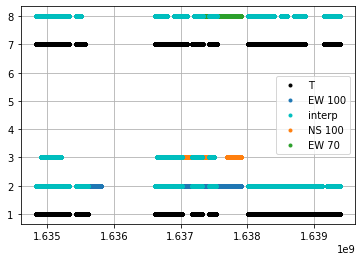

In [10]:
# plt.figure(figsize=(5,2))
plt.grid()
plt.plot(time_sys_100, np.ones(len(time_sys_100)), 'k.', label='T')
plt.plot(systime_EW, np.ones(len(systime_EW))*2, '.', label='EW 100')
plt.plot(temp_time_EW, np.ones(len(T_amb_100EW))*2, 'c.', label='interp')
plt.plot(systime_NS, np.ones(len(systime_NS))*3, '.', label='NS 100')
plt.plot(temp_time_NS, np.ones(len(T_amb_100NS))*3, 'c.', )

plt.plot(time_sys_70, np.ones(len(time_sys_70))*7, 'k.')
plt.plot(systime_70, np.ones(len(systime_70))*8, '.', label='EW 70')
plt.plot(temp_time_70, np.ones(len(T_amb_70EW))*8, 'c.')
plt.legend()

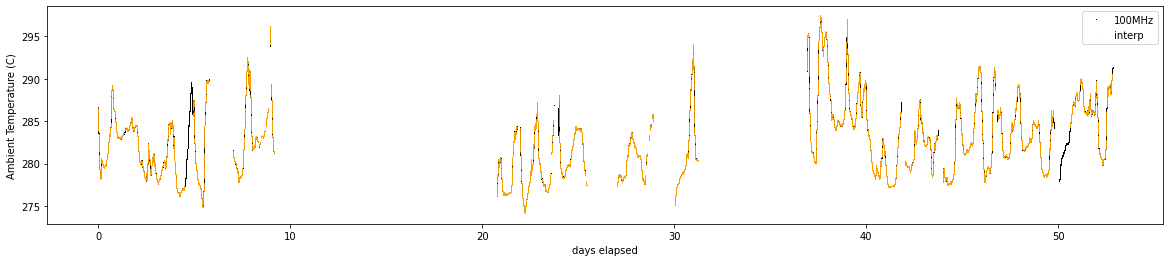

In [11]:
plt.figure(figsize=(20,4))
plt.ylabel('Ambient Temperature (C)')
plt.xlabel('days elapsed')
# plt.xlim(0,5)
# plt.ylim(0,25)
plt.plot((time_sys_100 - time_sys_100[0])/24/3600, T_amb_100, 'k,', label='100MHz')
plt.plot((temp_time_EW - time_sys_100[0])/24/3600, T_amb_100EW, ',', color='orange', alpha=0.2, label='interp')
# plt.plot((time_sys_70 - time_sys_100[0])/24/3600, T_amb_70, ',', label='70MHz')
plt.legend()